# Chap 13. 회귀분석
## 13.1 서론
- 두 개 이상의 변수에 대하여 관측값을 얻게 됨

1) 변수들이 서로 관련이 있는가

2) 관련이 있다면 얼마나 밀접하게 관련있는가

3) 관심이 있는 변수의 값을 그 외 다른 변수의 값으로부터 예측할 수 있는가

## 13.2 단순선형회귀모형
x, y의 관계를 규명하거나, x로부터 y를 예측하게 된다
- x: 독립변수, 설명변수 => 실험하는 사람에 의하여 통제되어 독립적으로 주어짐
- y: 종속변수, 반응변수 => 독립변수와 오차에 의해서 결정


In [11]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.formula.api as sm
from statsmodels import regression

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc, rcParams

In [8]:
# example 9
height = [181, 161, 170, 160, 158, 168, 162, 179, 183, 178, 171, 177, 163, 
          158, 160, 160, 158, 173, 160, 163, 167, 165, 163, 173, 178, 170, 
          167, 177, 175, 169,152, 158, 160, 160, 159, 180, 169, 162, 178, 
          173, 173, 171, 171, 170, 160, 167, 168, 166, 164, 173, 180]

weight = [78,49,52,53,50,57,53,54,71,73,55,73,51,53,65,48,59,64,48,53,78,
          45,56,70,68,59,55,64,59,55,38,45,50,46,50,63,71,52,74,52,61,65,
          68,57,47,48,58,59,55,74,74]

data = pd.DataFrame({'height':height, 'weight':weight})
fit = sm.ols('weight ~ height', data=data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     58.01
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           7.40e-10
Time:                        07:38:14   Log-Likelihood:                -168.30
No. Observations:                  51   AIC:                             340.6
Df Residuals:                      49   BIC:                             344.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7820     20.912     -4.819      0.000    -142.806     -58.758
height         0.9479      0.124      7.616      0.000       0.698       1.198
==============================================================================
Omnibus:                        5.480   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.425
Skew:                           0.569   Prob(JB):                        0.109
Kurtosis:                       3.886   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
fit.conf_int(0.05)

,0,1
Intercept,-142.806014,-58.757955
height,0.697793,1.197985


In [13]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

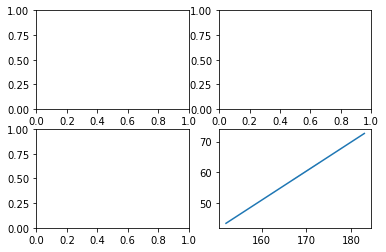

In [18]:
font_name = font_manager.FontProperties().get_name()
rc('font', family=font_name, size=10)
rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2,2)
slope, intercept = np.polyfit(height, weight, 1)
abline_values = [slope * i + intercept for i in height]
axes[0,0] = sns.lineplot(x=height, y=abline_values)